## Using IPython/Jupyter Notebooks and Ginga web viewer

This notebook shows examples of using an interactive Ginga viewer running in an HTML5 canvas with an IPython/Jupyter Notebook.  You do not need a special widget set to run this, just an HTML5 compliant browser.

See NOTES at end for more info installation/requirements.

There are two example FITS files used in this document.
You can get them [here](https://docs.google.com/file/d/0B6XTrKRuqwwKclUwTmxJbGlBTlU/edit?usp=sharing)
and [here](https://docs.google.com/file/d/0B6XTrKRuqwwKLXNtMjJUTmZBZ3M/edit?usp=sharing).
Put them in the same directory where you downloaded the notebook.  OR, you can just use your own FITS files, substituting the path to those files where below as necessary.

In [1]:
# Requirements:
from ginga.version import version
version

# Get ginga from github (https://github.com/ejeschke/ginga) or
#   pypi (https://pypi.python.org/pypi/ginga)
# Ginga documentation at: http://ginga.readthedocs.io/en/latest/

'2.5.20160926130800'

In [2]:
# setup
from ginga.web.pgw import ipg
# Set this to True if you have a non-buggy python OpenCv bindings--it greatly speeds up some operations
use_opencv = False

server = ipg.make_server(host='localhost', port=9914, use_opencv=use_opencv)

In [3]:
# Start viewer server
# IMPORTANT: if running in an IPython/Jupyter notebook, use the no_ioloop=True option
server.start(no_ioloop=True)

In [4]:
# Get a viewer
# You can have as many viewers as you want.  Give each viewer a unique name.
v1 = server.get_viewer('v1')

slider value is 4.000000, setting will be 1.033548


In [5]:
# where is my viewer
v1.url

'http://localhost:9914/app?id=v1'

In [6]:
# If you have the 'webrowser' module installed, this will open the viewer in a new window.
# If not, just open the viewer URL (shown above) in a separate browser tab or window.
v1.open()

*NOTE*: if you don't have the `webbrowser` module, *open the link that was printed in the cell above in a new window* to get the viewer.  

You can open as many of these viewers as you want--just keep a handle to it and use a different name for each unique one.

Keyboard/mouse bindings in the viewer window: http://ginga.readthedocs.io/en/latest/quickref.html

If you are using a trackpad instead of a mouse you may want to adjust the "Zoom sensitivity" slider to your taste.

In [7]:
# Load an image into the viewer
# (change the path to where you downloaded the sample images, or use your own)
v1.load('camera.fits')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [8]:
# Example of embedding a viewer
v1.embed(height=650)

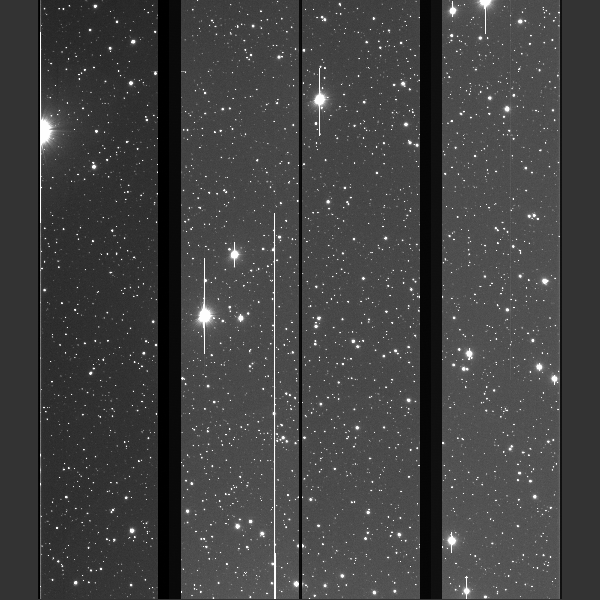

In [9]:
# capture the screen
v1.show()


In [10]:
# Let's get the pan position we just set
dx, dy = v1.get_pan()
dx, dy

(1136.0, 2136.5)

In [11]:
# Getting values from the FITS header is also easy
img = v1.get_image()
hdr =img.get_header()
hdr['OBJECT']

'M27'

In [12]:
# What are the coordinates of the pan position?
# This uses astropy.wcs under the hood if you have it installed
img.pixtoradec(dx, dy)

(300.16929984148425, 22.80602873666544)

In [13]:
# Set cut level algorithm to use
v1.set_autocut_params('zscale', contrast=0.25)
# Auto cut levels on the image
v1.auto_levels()

In [14]:
# Let's do an example of the two-way interactivity
# First, let's add a drawing canvas
canvas = v1.add_canvas()

In [15]:
# delete all objects on the canvas
canvas.delete_all_objects()
# set the drawing parameters
canvas.set_drawtype('point', color='black')

Now, in the Ginga window, draw a point using the right mouse button (if you only have one mouse button (e.g. Mac) press and release spacebar, then click and drag)

In [16]:
# get the pixel coordinates of the point we just drew
p = canvas.objects[0]
p.x, p.y

(1366.0368982794969, 2379.5578547858836)

In [17]:
# Get the RA/DEC in degrees of the point
img.pixtoradec(p.x, p.y)

(300.15532179130605, 22.81968791732208)

In [18]:
# Get RA/DEC in H M S sign D M S
img.pixtoradec(p.x, p.y, format='hms')

(20, 0, 37.277229913452175, 1, 22, 49, 10.876502359489677)

In [ ]:
# Get RA/DEC in classical string notation
img.pixtoradec(p.x, p.y, format='str')

In [19]:
# Verify we have a valid coordinate system defined
img.wcs.coordsys

'fk5'

In [20]:
# get the "native" (astropy) wcs
n_wcs = img.wcs.wcs
type(n_wcs)

astropy.wcs.wcs.WCS

In [21]:
# Get viewer model holding data
image = v1.get_image()
image.get_minmax()

(135, 65535)

In [22]:
# get viewer data
data_np = image.get_data()
import numpy as np
np.mean(data_np)

687.80452215104344

In [23]:
# Set viewer cut levels
v1.cut_levels(170, 1000)

In [24]:
# set a color map on the viewer 
v1.set_color_map('smooth')

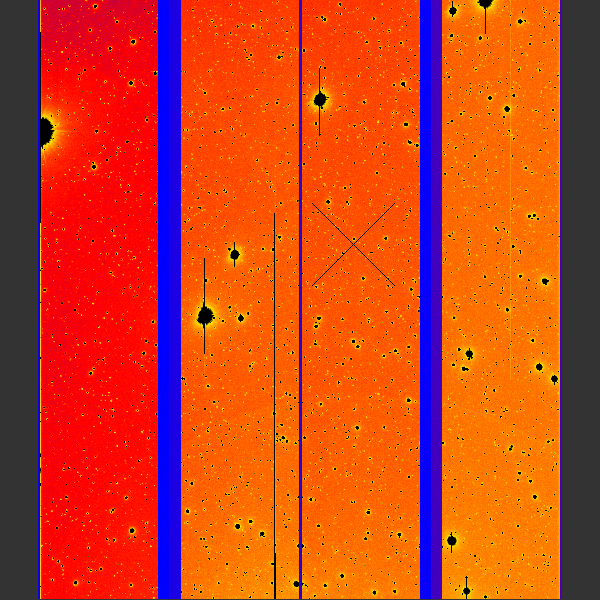

In [25]:
# Image will appear in this output
v1.show()

In [26]:
# Ginga native color maps
from ginga import cmap
print(cmap.get_names())

['aips0', 'backgr', 'blue', 'blulut', 'color', 'gray', 'grayclip', 'green', 'heat', 'idl11', 'idl12', 'idl14', 'idl15', 'idl2', 'idl4', 'idl5', 'idl6', 'isophot', 'light', 'manycol', 'pastel', 'rainbow', 'rainbow1', 'rainbow2', 'rainbow3', 'rainbow4', 'ramp', 'random', 'random1', 'random2', 'random3', 'random4', 'random5', 'random6', 'real', 'red', 'smooth', 'smooth1', 'smooth2', 'smooth3', 'soss', 'staircase', 'stairs8', 'stairs9', 'standard']


In [27]:
# Add matplotlib color maps
cmap.add_matplotlib_cmaps()
print(cmap.get_names())

['Accent', 'Accent_r', 'afmhot', 'afmhot_r', 'aips0', 'autumn', 'autumn_r', 'backgr', 'binary', 'binary_r', 'blue', 'Blues', 'Blues_r', 'blulut', 'bone', 'bone_r', 'BrBG', 'BrBG_r', 'brg', 'brg_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'bwr', 'bwr_r', 'CMRmap', 'CMRmap_r', 'color', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'Dark2', 'Dark2_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'GnBu', 'GnBu_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grayclip', 'green', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'heat', 'hot', 'hot_r', 'hsv', 'hsv_r', 'idl11', 'idl12', 'idl14', 'idl15', 'idl2', 'idl4', 'idl5', 'idl6', 'inferno', 'inferno_r', 'isophot', 'jet', 'jet_r', 'light', 'magma', 'magma_r', 'manycol', 'nipy_spectral', 'nipy_spectral_r

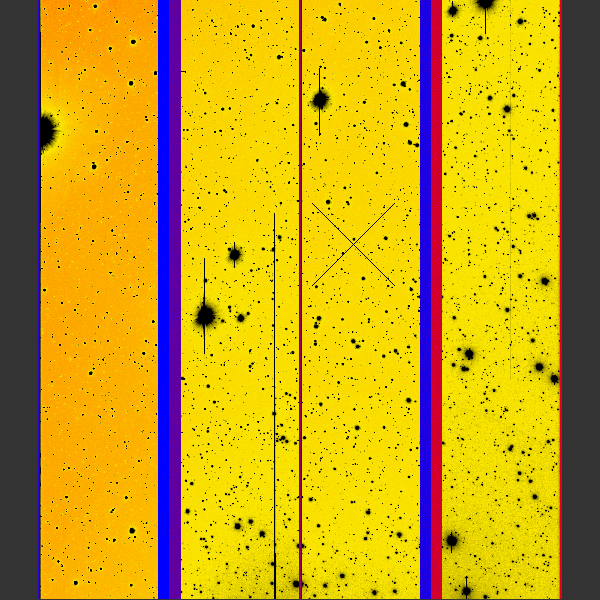

In [28]:
# Set color distribution algorithm
# choices: linear, log, power, sqrt, squared, asinh, sinh, histeq, 
v1.set_color_algorithm('asinh')
v1.show()

In [29]:
# restore to linear
v1.set_color_algorithm('linear')
v1.set_color_map('gray')

In [30]:
# Example of setting another draw type.
canvas.delete_all_objects()
canvas.set_drawtype('rectangle')

Now right-drag to draw a *small* rectangle in the Ginga image.
Remember: On a single button pointing device, press and release spacebar, then click and drag.

Try to include some objects. 


In [31]:
# Find approximate bright peaks in a sub-area
from ginga.util import iqcalc
iq = iqcalc.IQCalc()

img = v1.get_image()
r = canvas.objects[0]
data = img.cutout_shape(r)
peaks = iq.find_bright_peaks(data)
peaks[:20]

[(135.0, 1.0),
 (2.0, 9.0),
 (18.0, 22.0),
 (69.0, 24.0),
 (171.0, 26.0),
 (54.0, 27.0),
 (40.0, 41.0),
 (77.0, 63.0),
 (49.0, 79.0),
 (169.0, 82.0),
 (24.0, 83.0),
 (145.0, 88.0),
 (63.0, 90.0),
 (151.0, 90.0),
 (6.0, 101.0),
 (123.0, 101.0),
 (158.0, 104.0),
 (46.0, 109.0),
 (112.0, 110.0),
 (167.0, 112.0)]

In [32]:
# evaluate peaks to get FWHM, center of each peak, etc.
objs = iq.evaluate_peaks(peaks, data)
# how many did we find with standard thresholding, etc.
# see params for find_bright_peaks() and evaluate_peaks() for details
len(objs)

36

In [33]:
# example of what is returned
o1 = objs[0]
o1

{'y': 1, 'objy': 1.3994662894596517, 'fwhm_x': 3.4543203184647915, 'elipse': 0.4113496580531546, 'objx': 134.9493555460453, 'fwhm': 2.6411532350734213, 'pos': 0.9391627935979129, 'fwhm_radius': 15, 'x': 135, 'background': 473.0, 'skylevel': 536.6500000000001, 'fwhm_y': 1.420933481806556, 'brightness': 56815.19909343942}

In [34]:
# pixel coords are for cutout, so add back in origin of cutout
#  to get full data coords RA, DEC of first object
x1, y1, x2, y2 = r.get_llur()
img.pixtoradec(x1 + o1.objx, y1 + o1.objy)

(300.1526408567536, 22.811246755963015)

In [35]:
# Draw circles around all objects
Circle = canvas.get_draw_class('circle')
for obj in objs:
    x, y = x1 + obj.objx, y1 + obj.objy
    if r.contains(x, y):
        canvas.add(Circle(x, y, radius=10, color='yellow'))
        
# set pan and zoom to center
v1.set_pan((x1 + x2) / 2, (y1 + y2) / 2)
v1.scale_to(0.75, 0.75)

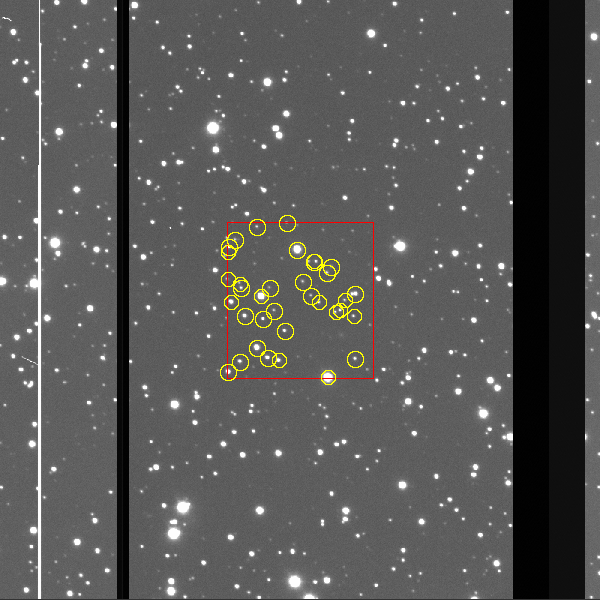

In [36]:
v1.show()

How about some plots...?

In [37]:
# Load an image from a spectrograph at least 1000x1000 (e.g. spectra.fits)
v1.load('spectra.fits')

the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]
the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [38]:
# swap XY, flip Y, change colormap back to "ramp"
v1.set_color_map('gray')
v1.transform(False, True, True)
v1.auto_levels()

In [39]:
# Programmatically add a line along the figure at designated coordinates
canvas.delete_all_objects()
Line = canvas.get_draw_class('line')
l1 = Line(0, 512, 250, 512)
tag = canvas.add(l1)

In [40]:
# Set the pan position and zoom to 1:1.  Show what we did.
v1.set_pan(125, 512)
v1.scale_to(1.0, 1.0)

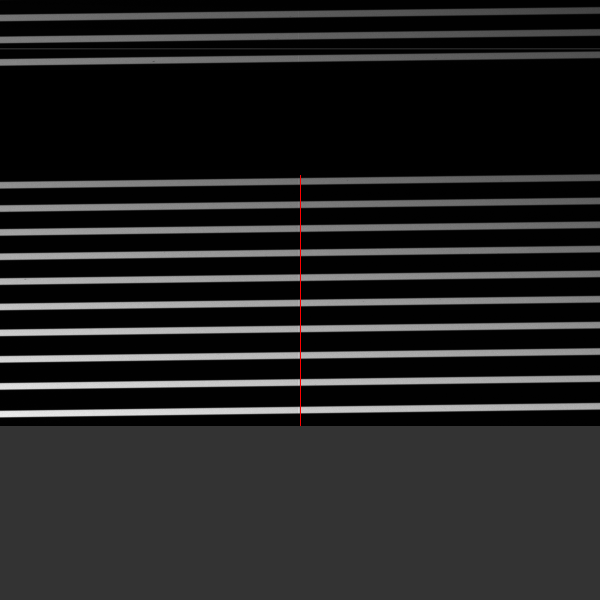

In [41]:
v1.show()

In [42]:
# Get the pixel values along this line
img = v1.get_image()
values = img.get_pixels_on_line(l1.x1, l1.y1, l1.x2, l1.y2)
values[:10]

[1231.0,
 1237.0,
 1220.0,
 1233.0,
 1235.0,
 1229.0,
 1229.0,
 1234.0,
 1228.0,
 1237.0]

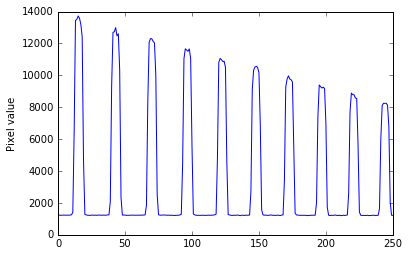

In [43]:
# Plot the 'cuts'
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.cla()
plt.plot(values)
plt.ylabel('Pixel value')

plt.show()

In [44]:
# Plot the cuts that we will draw interactively
canvas.delete_all_objects()
canvas.set_drawtype('line')

Now draw a line through the image (remember to use right mouse btn or else press space bar first)

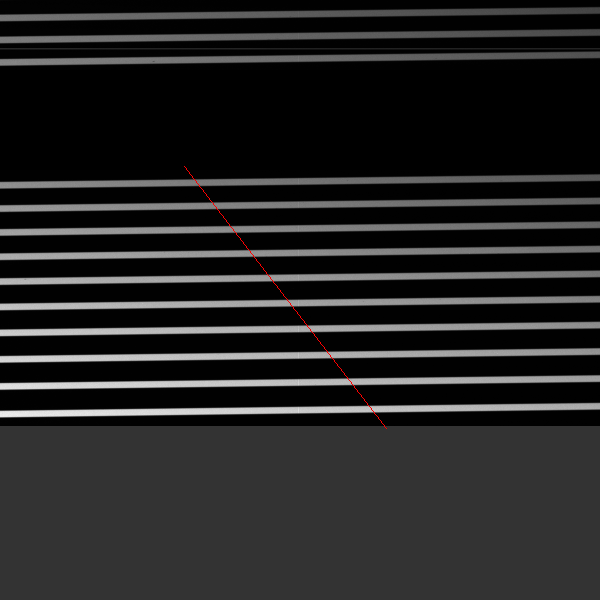

In [48]:
# show our line we drew
v1.show()

In [49]:
def getplot(v1):
    l1 = canvas.objects[0]
    img = v1.get_image()
    values = img.get_pixels_on_line(l1.x1, l1.y1, l1.x2, l1.y2)
    plt.cla()
    
    plt.plot(values)
    plt.ylabel('Pixel value')
    plt.show()

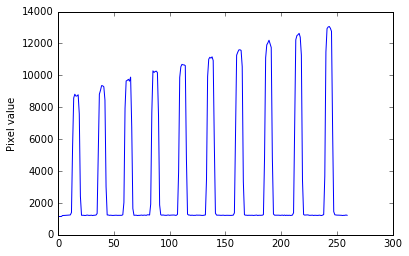

In [50]:
getplot(v1)

## Other ways of loading data

In [51]:
# make some random data in a numpy array
import numpy as np
import random
data_np = np.random.rand(512, 512)

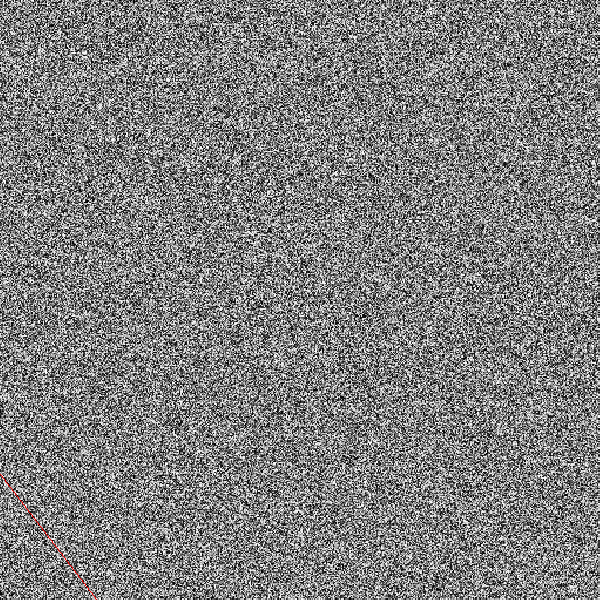

In [52]:
# example of loading numpy data directly to the viewer
v1.load_data(data_np)
v1.show()

In [ ]:
# example of loading astropy.io.fit HDUs
from astropy.io import fits
fits_f = fits.open('camera.fits', 'readonly')
hdu = fits_f[0]
v1.load_hdu(hdu)

In [ ]:
# resize the viewer
# NOTE: keep in mind that larger sizes will slow down rendering speed
v1.resize(800, 800)

## Requirements

Needed packages for this notebook:

- [`ginga`](https://github.com/ejeschke/ginga), jupyter/ipython w/notebook feature
- typical scientific python reqs: `numpy`, `scipy`, `astropy`
- for drawing, you will need either PIL/pillow, OpenCv or the [`aggdraw` module](https://github.com/ejeschke/aggdraw) module (python 2 only).  PIL is included in anaconda, so is usually all you need.
- optional, but highly recommended: `webbrowser`, OpenCv

Latest Ginga documentation, including detailed installation instructions, can be found [here](http://ginga.readthedocs.io/en/latest/).